# <font style="color:rgb(50,120,229)">Second Order Derivative Filters</font>

We know that the Sobel operator calculates the first derivative in the x- and y-directions. When the intensity changes abruptly, the Sobel filter response fires up, so the response of the Sobel filter can be used as an edge detector. 

However, first derivative operators (like the Sobel operators) are not the only way to detect edges. Second derivative operators have a zero crossing at the location of the edges.

![Second Order Derivative Filters](https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m3.2-secondOrderDerivative.png)

In the image above, we see the effects of first and second derivatives in the 1-d case. A 1-d edge is shown in black. Notice, the first derivative curve, shown in green, has a maximum at the location of the edge. The second derivative, shown in blue, has a zero crossing at the location of the edge. This fact is used to recognize edges.

## <font style="color:rgb(50,120,229)">Laplacian Filter</font>

The [Laplacian](http://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html#laplacian) is a filter that is based on the second derivative. 

Mathematically, the Laplacian operator or filter is given by

$$
L(x,y) = \frac{\partial^2 I }{\partial x^2} +  \frac{\partial^2 I }{\partial y^2}
$$

I have to admit, that looks scary. But fortunately, after the mathematicians did their math, they told us the above expression reduces to the simple convolution kernel shown below. 

$$
\begin{bmatrix}
0 & 1 & 0\\
1 & -4 & 1\\
0 & 1 & 0
\end{bmatrix}
$$


The Laplacian filter is very sensitive to noise and therefore it is important to smooth the image before applying it. 

**<font style="color:rgb(255,0,0)">Note:</font>** As a rule of thumb, **summing and averaging operations are less affected by noise, and differencing operations are greatly affected by noise**. Here is a simple example. 

Let us consider two numbers. One is supposed to be 10 and the other is supposed to be 11, but because of a noise, the second number is recorded as 12. Now, the true difference between the numbers is 11 - 10 = 1. But because of noise, the difference is 12  - 10 = 2. So we have made a mistake of 100% while calculating the difference! 

On the other hand, the true sum of the two numbers is 11 + 10 = 21, but because of noise we estimate it to be 12 + 10 = 22. The error is ( 22 - 21 ) / 21 = 4.76%. 

So, while calculating derivatives we have to worry about noise, but while calculating integrals we don’t have to worry about noise. 

### <font style="color:rgb(8,133,37)">Laplacian Filter in OpenCV</font>

In [1]:
import cv2
import numpy as np
DATA_PATH = './data/'
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
img = cv2.imread(DATA_PATH+"images/sample.jpg", cv2.IMREAD_GRAYSCALE)

# Check for invalid input
if img is None:
    print ("Image not read")

kernelSize = 1

Apply laplacian function on the image after gaussian blurring. Note that the depth of the output images is set to `CV_32F` because gradients can take negative values

In [54]:
# Applying laplacian
img1 = cv2.GaussianBlur(img, (3, 3), 0, 0)
laplacian = cv2.Laplacian(img1, cv2.CV_32F, ksize = kernelSize, scale = 1, delta = 0)

print(np.min(laplacian))
print(np.max(laplacian))

-129.0
106.0


In [55]:
# Normalize results
cv2.normalize(laplacian, 
                dst = laplacian, 
                alpha = 0, 
                beta = 1, 
                norm_type = cv2.NORM_MINMAX, 
                dtype = cv2.CV_32F)

array([[0.5489361 , 0.5361702 , 0.5531914 , ..., 0.5489361 , 0.5489361 ,
        0.5489361 ],
       [0.5361702 , 0.5574468 , 0.5489361 , ..., 0.5489361 , 0.5489361 ,
        0.5531914 ],
       [0.5489361 , 0.54468083, 0.5404255 , ..., 0.5574468 , 0.5574468 ,
        0.5361702 ],
       ...,
       [0.5489361 , 0.5531914 , 0.54468083, ..., 0.5617021 , 0.5574468 ,
        0.58297867],
       [0.5489361 , 0.5531914 , 0.54468083, ..., 0.5489361 , 0.5574468 ,
        0.5574468 ],
       [0.5489361 , 0.5531914 , 0.54468083, ..., 0.5148936 , 0.5404255 ,
        0.5404255 ]], dtype=float32)

Text(0.5, 1.0, 'Laplacian')

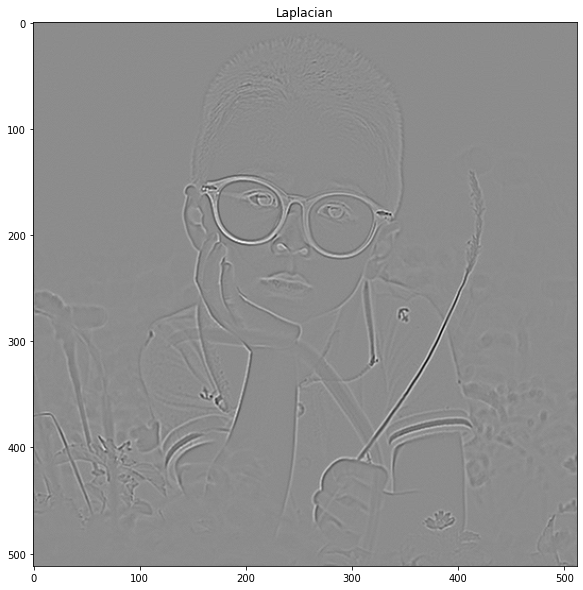

In [56]:
plt.figure(figsize=[20,10])
plt.imshow(laplacian,cmap='gray');plt.title("Laplacian")

You can easily make out the edges from the above laplacian image.

In [51]:
s = 149
e = 154

print(img[s:e, s:e])
print()

img1 = cv2.GaussianBlur(img,(3,3),0,0)
print(img1[s:e, s:e])
print()

laplacian = cv2.Laplacian(img1, cv2.CV_32F, ksize = kernelSize, scale = 1, delta = 0)
print(laplacian[s:e, s:e])
print(np.min(laplacian))
print(np.max(laplacian))
print()

cv2.normalize(laplacian, 
                dst = laplacian, 
                alpha = 0, 
                beta = 1, 
                norm_type = cv2.NORM_MINMAX, 
                dtype = cv2.CV_32F)
print(laplacian[s:e, s:e])

[[106 110 112 139 144]
 [105 112 126 147 144]
 [110 121 143 139 139]
 [117 123 130 124 131]
 [151 135 114 116 127]]

[[109 113 121 134 142]
 [109 115 128 139 141]
 [112 121 132 137 136]
 [123 126 127 128 131]
 [156 146 133 126 129]]

[[  5.  11.  13.  -5.  -9.]
 [  9.  11.  -5. -16. -10.]
 [ 15.   1. -15. -13.  -2.]
 [ 20.  13.  11.   9.   3.]
 [ -2.  13.  28.  27.  11.]]
-129.0
106.0

[[0.5702127  0.5957446  0.60425526 0.52765954 0.51063824]
 [0.587234   0.5957446  0.52765954 0.48085102 0.50638294]
 [0.6127659  0.5531914  0.48510635 0.49361697 0.5404255 ]
 [0.6340425  0.60425526 0.5957446  0.587234   0.5617021 ]
 [0.5404255  0.60425526 0.66808504 0.66382974 0.5957446 ]]


In [52]:
134+141+137+128-4*139

-16

In [53]:
v = -16
vmin = -129
vmax = 106

(v - vmin)/(vmax-vmin)

0.4808510638297872